In [ ]:
#https://ai.stanford.edu/%7Ejkrause/cars/car_dataset.html
!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
! tar -xzf cars_train.tgz
!wget https://ai.stanford.edu/%7Ejkrause/cars/car_devkit.tgz
!tar -xzf car_devkit.tgz

#Asegurate de activar el entorno con GPU :D

--2021-11-24 02:33:31--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  14.2MB/s    in 79s     

2021-11-24 02:34:50 (11.9 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]

--2021-11-24 02:35:01--  https://ai.stanford.edu/%7Ejkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K   256KB/s    in 1.3s    

2021-11-24 02:35:03 (256 KB/s) - ‘car_devkit.tgz’ saved [330960/330960]



# Redes Neuronales Convolucionales (breve explicación)

Como bien sabemos, las CNNS basan su funcionamiento en las convoluciones 2D de las imágenes

<img src='https://miro.medium.com/max/464/0*e-SMFTzO8r7skkpc' width=500px></img>

En esencia, las CNNS realizan una convolución 3D por cada filtro que se define. La operación es como se muestra a continuación.

<img src='https://raw.githubusercontent.com/valoxe/image-storage-1/master/blog-deep-learning/cnnumpy-naive/4.gif'> </img>

Mediante la convolución en diferentes capas, características particulares delas imágenes van surgiendo, por ejemplo:

<img src='https://ichi.pro/assets/images/max/724/1*QPRC1lcfYxcWWPAC2hrQgg.gif'>

Estas características pueden después ser procesadas (generalmente por otra red de neuronas artificiales) y realizar tareas tan complejas como la clasificación o segmentación.

Lo importante en las CNNs es que los valores que tienen los filtros no son definidos previamente, sino que son aprendidos a través de un proceso de entrenamiento supervisado (se compara con datos conocidos).

# ¿Cómo armar tu CNN?

Para los ejercicios que se desarrollarán a continuación, se utilizará la librería Tensorflow (una de las más importantes en Deep Learning).

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Obten datos

In [ ]:
#Vamos a utilizar una base de datos sencilla
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.
test_images = test_images/255.
train_images = tf.expand_dims(train_images, axis=-1)
test_images = tf.expand_dims(test_images, axis=-1)

print(train_images.shape, test_images.shape)
#plt.imshow(train_images[0])

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)


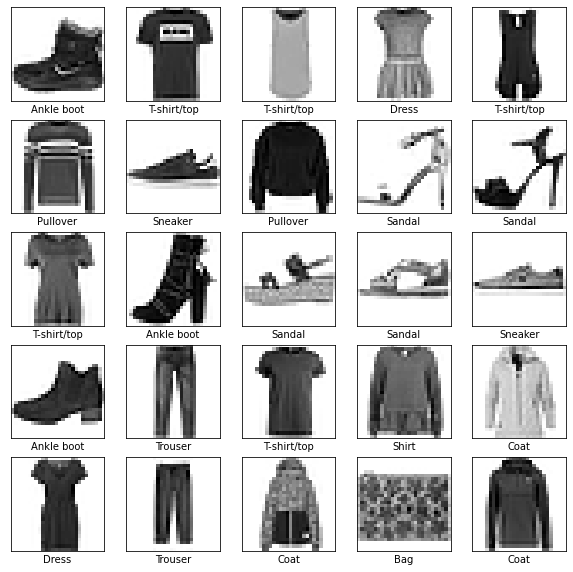

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, ..., 0], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Arma tu red

Selecciona las capas que formarán tu red, según lo que necesites.

### Capa de Convolución

Es la capa principal (justo por eso se llaman convolucionales :P), y realiza la convolución de una capa y genera otra capa más.

<img src='https://www.researchgate.net/profile/Hiromu-Yakura/publication/323792694/figure/fig1/AS:615019968475136@1523643595196/Outline-of-the-convolutional-layer.png' width=600px>


### Capa de agrupamiento (o pooling)

Esta capa tiene la tarea de

* Reducir la dimensionalidad de las capas más profundas
* Conservar información relevante de las capas anteriores

Para ello se utilizan diferentes operaciones, la más popular es el *max pooling*, donde selecciona el valor más grande de un grupo de números, y ese es el que pasa a la siguiente capa.

<img src='https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.png' width=600px>


### Capa de activación

Aquí sucede la magia de las CNNs, pues el comportamiento no lineal de las mismas se genera aquí. Para ello, se puede utilizar una gran variedad de funciones de activación, entre las más importantes están:

<img src='https://miro.medium.com/max/1838/0*44z992IXd9rqyIWk.png' width=600px>


### Capa completamente conectada (fully connected)

Esta última capa se utiliza para hacer predicciones, como clasificaciones o regresiones. Toma la información codificada de las capas de convolución y la procesa para generar el vector de resultado final.

<img src='https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1200%2C564&ssl=1'>


In [ ]:
#Armemos las capas de tu red, utilizando una notación sencilla
#https://www.tensorflow.org/api_docs/python/tf/keras/layers

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),# Para pasarla a la fully connected
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=train_images.shape)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (60000, 28, 28, 64)       640       
                                                                 
 activation_3 (Activation)   (60000, 28, 28, 64)       0         
                                                                 
 conv2d_4 (Conv2D)           (60000, 28, 28, 32)       18464     
                                                                 
 activation_4 (Activation)   (60000, 28, 28, 32)       0         
                                                                 
 flatten_2 (Flatten)         (60000, 25088)            0         
                                                                 
 dense_2 (Dense)             (60000, 10)               250890    
                                                                 
Total params: 269,994
Trainable params: 269,994
Non-tr

## Entrenemos el modelo

In [ ]:
model.fit(train_images, train_labels, epochs=10)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.2503 - accuracy: 0.9101


In [ ]:
print(model.predict(test_images)[10])
test_labels[10]

[0.10082111 0.09083197 0.09728113 0.09869492 0.11112378 0.09342235
 0.10517745 0.09787218 0.10715174 0.09762333]


4

## Evaluemos el modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrecisión:', test_acc)

313/313 - 1s - loss: 0.2786 - accuracy: 0.8993 - 1s/epoch - 5ms/step

Precisión: 0.8992999792098999


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

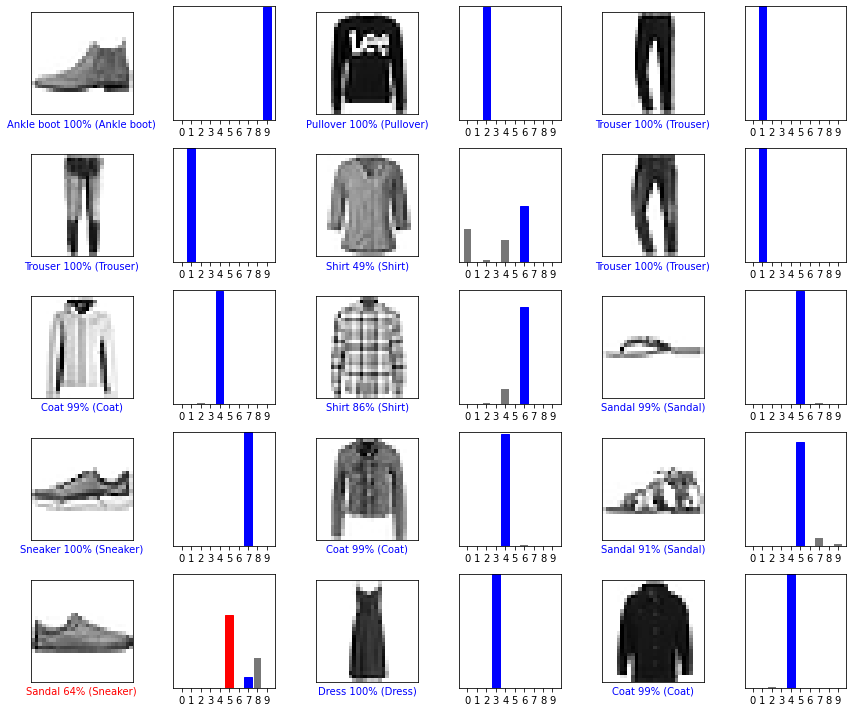

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images[..., 0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# Aumento de datos

En muchas ocasiones no contamos con datos suficientes para realizar nuestro entrenamiento. En estos casos se suelen utilizar diferentes técnicas de aumento de datos que generan variaciones en los datos originales que mantienen la calidad de la información.

Algunas operaciones que suelen utilizarse son:

* Cambio de resolución (tamaño o escala)
* Modificación de contraste
* Agregar ruido
* Voltear
* Rotar

Para esto, podemos tomar dos estrategias: Hacer el aumento de datos previo al procesamiento o durante.

In [ ]:
from scipy.io import loadmat
import numpy as np

annots = loadmat('/content/devkit/cars_train_annos.mat')

lista = [[item.flat[0] for item in row] for row in annots['annotations'][0]]

clasificacion = {d[-1]:d[-2] for d in lista}
for k in list(clasificacion.keys())[:5]:
    print(f'La imagen {k} es de la clase {clasificacion[k]}')

La imagen 00001.jpg es de la clase 14
La imagen 00002.jpg es de la clase 3
La imagen 00003.jpg es de la clase 91
La imagen 00004.jpg es de la clase 134
La imagen 00005.jpg es de la clase 106


In [ ]:
from skimage.io import imread
from skimage.color import gray2rgb
import os
import matplotlib.pyplot as plt

from glob import glob
im_fnames = glob('/content/cars_train/*.jpg')
len(im_fnames), im_fnames[0]

numero_de_imagenes = 100
imgs = []
clss_viejas = []
for fname in im_fnames[:numero_de_imagenes]:
    nombre = os.path.basename(fname)
    img = imread(fname)/255.
    #Si tenemos imágenes en escala de grises
    if len(img.shape)!=3:
        img = gray2rgb(img)
    clase = clasificacion[nombre]
    imgs.append(img)
    clss_viejas.append(clase)

In [ ]:
#Hacemos un pequeño ajuste a las clases para no tener tantas neuronas de salida
cambiar = {cls:i for i, cls in enumerate(np.unique(clss_viejas))}
clss = [cambiar[c] for c in clss_viejas]
print(clss_viejas[:10])
clss[:10]

[74, 87, 15, 176, 17, 107, 32, 56, 71, 16]


[29, 33, 3, 71, 5, 42, 13, 23, 27, 4]

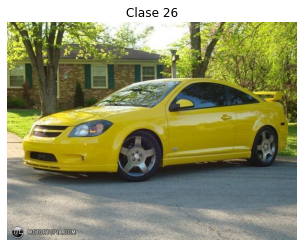

(450, 600, 3)

In [ ]:
N = 11
plt.imshow(imgs[N])
plt.title(f'Clase {clss[N]}')
plt.axis('off')
plt.show()
imgs[N].shape

## Generando datos aumentados

In [ ]:
def ver_transformacion(img, f, *args):
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(img)
    ax[1].imshow(f(img, *args))
    plt.show()

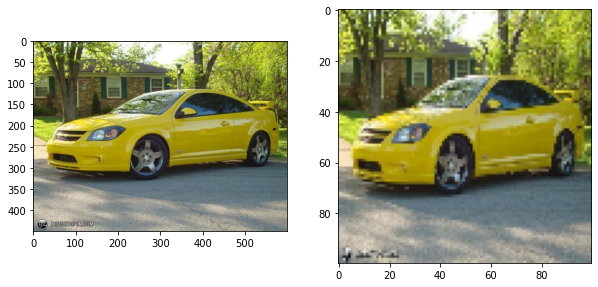

In [ ]:
# Cambiando el tamaño
from skimage.transform import resize

def cambiar_tamano(img, new_shape):
    menor = min(new_shape)<min(img.shape)
    return resize(img, new_shape, anti_aliasing=menor)

N = 11
ver_transformacion(imgs[N], cambiar_tamano, (100,100))

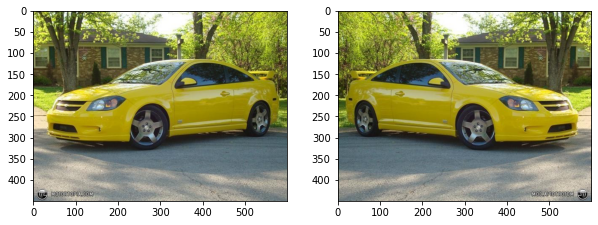

In [ ]:
#Girar horizontalmente una imagen
def voltear(img):
            #  Y  X    C
    return img[:, ::-1, :]

N = 11
ver_transformacion(imgs[N], voltear)

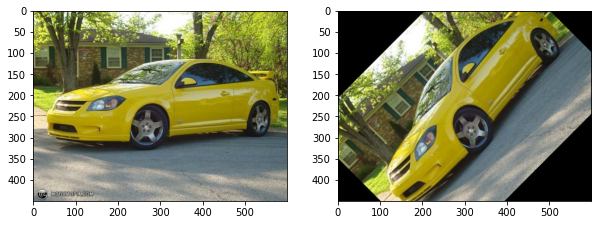

In [ ]:
#Rotar la imagen sobre su centro
from skimage.transform import rotate

def rotar(img, ang):
    return rotate(img, ang, resize=False)

N = 11
ver_transformacion(imgs[N], rotar, 45)

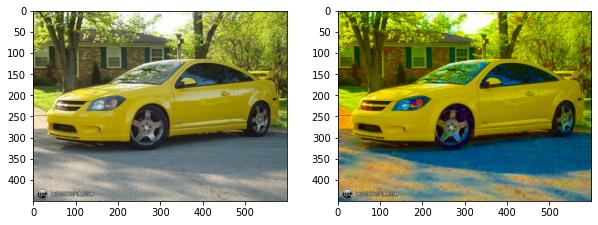

In [ ]:
# Saturar los colores de la imagen
def saturar(img, factor):
    return tf.image.adjust_saturation(img, factor).numpy()

N = 11
ver_transformacion(imgs[N], saturar, 5)

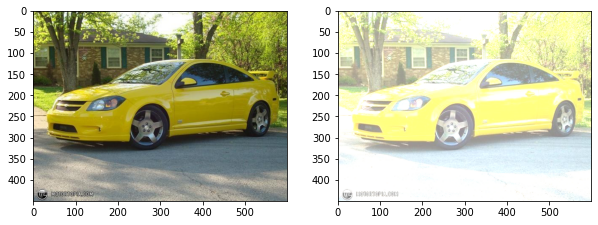

In [ ]:
# Ajustar el brillo
# Saturar los colores de la imagen
def brillo(img, factor):
    return np.clip(tf.image.adjust_brightness(img, factor).numpy(), 0, 1)

N = 11
ver_transformacion(imgs[N], brillo, 0.5)

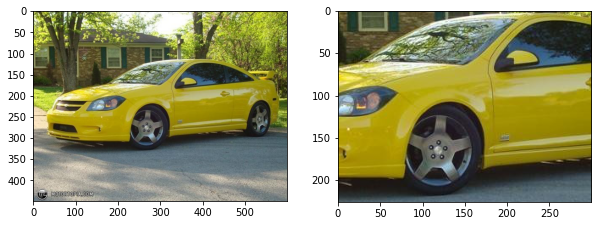

In [ ]:
#Obtener una región desde el centro
def centro(img, factor):
    return tf.image.central_crop(img, factor)

N = 11
ver_transformacion(imgs[N], centro, 0.5)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


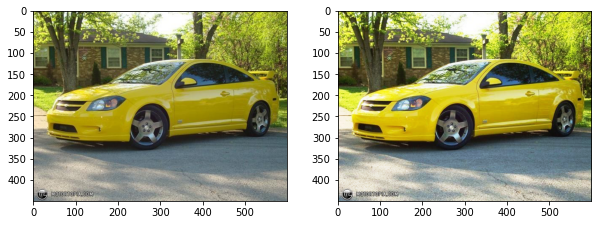

In [ ]:
#Ecualizar los histogramas
from skimage.exposure import equalize_hist

def ecualizar(img):
    return equalize_hist(img)

N = 11
ver_transformacion(imgs[N], ecualizar)

In [ ]:
def aumentar(img):
    ##Define los pasos que utilizarás para hacer tu aumento de datos
    return cambiar_tamano(img, (300,300))

In [ ]:
n_aumentos_x_imagen = 1
aumentadas = []
clss_aum = []
for img, cls in zip(imgs, clss):
    for _ in range(n_aumentos_x_imagen):
        nueva = aumentar(img)
        aumentadas.append(nueva)
        clss_aum.append(cls)

imgs = [cambiar_tamano(i, (300,300)) for i in imgs]

imgs_arr = np.array(imgs+aumentadas)
clss_arr = np.array(clss+clss_aum)

imgs_arr.shape

(200, 300, 300, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(imgs_arr, clss_arr, train_size=0.8 )

print(X_train.shape, y_train.shape)

(160, 300, 300, 3) (160,)


## Probemos un nuevo modelo

In [ ]:
model = keras.Sequential([
    ###Diseña tu arquitectura de red
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),# Para pasarla a la fully connected
    keras.layers.Dense(len(np.unique(clss_arr)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=X_train.shape)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (160, 300, 300, 64)       1792      
                                                                 
 activation_7 (Activation)   (160, 300, 300, 64)       0         
                                                                 
 conv2d_8 (Conv2D)           (160, 300, 300, 32)       18464     
                                                                 
 activation_8 (Activation)   (160, 300, 300, 32)       0         
                                                                 
 flatten_4 (Flatten)         (160, 2880000)            0         
                                                                 
 dense_4 (Dense)             (160, 78)                 224640078 
                                                                 
Total params: 224,660,334
Trainable params: 224,660,33

In [ ]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
5/5 [==============================] - 5s 778ms/step - loss: 60.5852 - accuracy: 0.0625
Epoch 2/2
5/5 [==============================] - 4s 766ms/step - loss: 1.5839 - accuracy: 0.7750


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nPrecisión:', test_acc)

2/2 - 1s - loss: 3.0564 - accuracy: 0.6750 - 1s/epoch - 513ms/step

Precisión: 0.675000011920929


# Todo es más fácil con Hub

[Tensorflow Hub](https://tfhub.dev/) es una plataforma donde se puede acceder a modelos preentrenados y armar nuevamente el modelo para usar en inferencias. Esto es ideal para cuando no tienes tiempo para entrenar un modelo y alguien más ya lo hizo por ti...

Además, tienen [tutoriales](https://www.tensorflow.org/hub/tutorials) muy bien explicados...

In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

os.chdir('/content/')
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [ ]:
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

--2021-11-24 03:23:38--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.001s  

2021-11-24 03:23:38 (37.4 MB/s) - ‘original.png’ saved [34146/34146]



Utilizaremos el modelo de super resolución basado en el artículo de [Wang *et al.*](https://arxiv.org/pdf/1809.00219.pdf)

In [ ]:
IMAGE_PATH = "original.png"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
%matplotlib inline
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def plot_image(image, title="", figsize=(15,15)):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.figure(figsize=figsize)
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

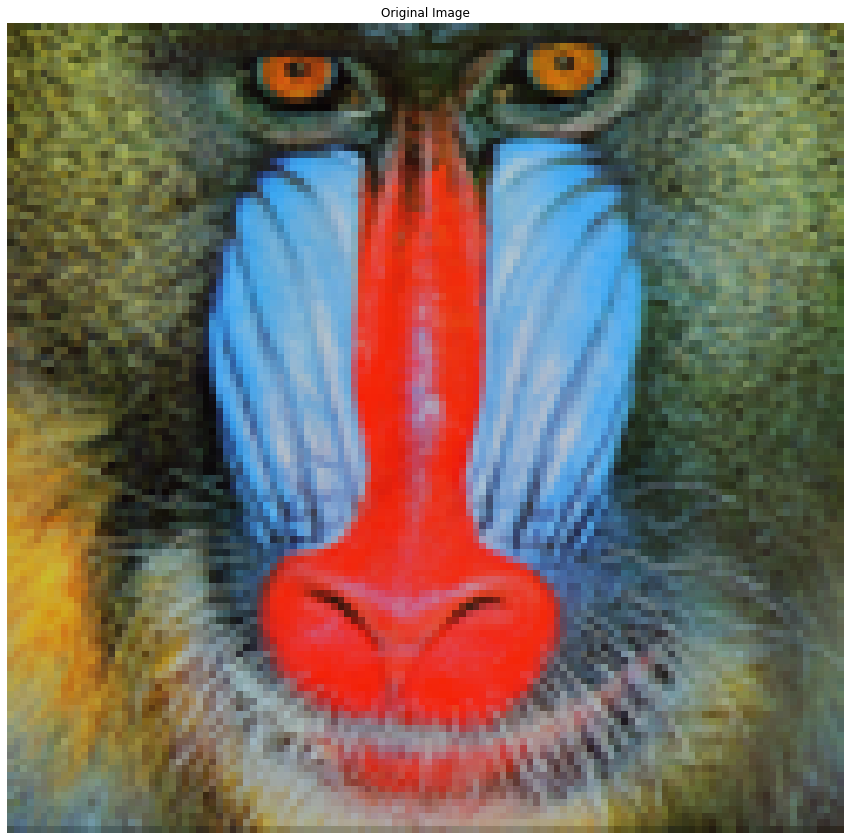

In [ ]:
#Cargando la imagen
hr_image = preprocess_image(IMAGE_PATH)
plot_image(tf.squeeze(hr_image), title="Original Image", figsize=(15,15))
#save_image(tf.squeeze(hr_image), filename="Original Image")

In [ ]:
#Cargando el modelo
model = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



Time Taken: 1.777927


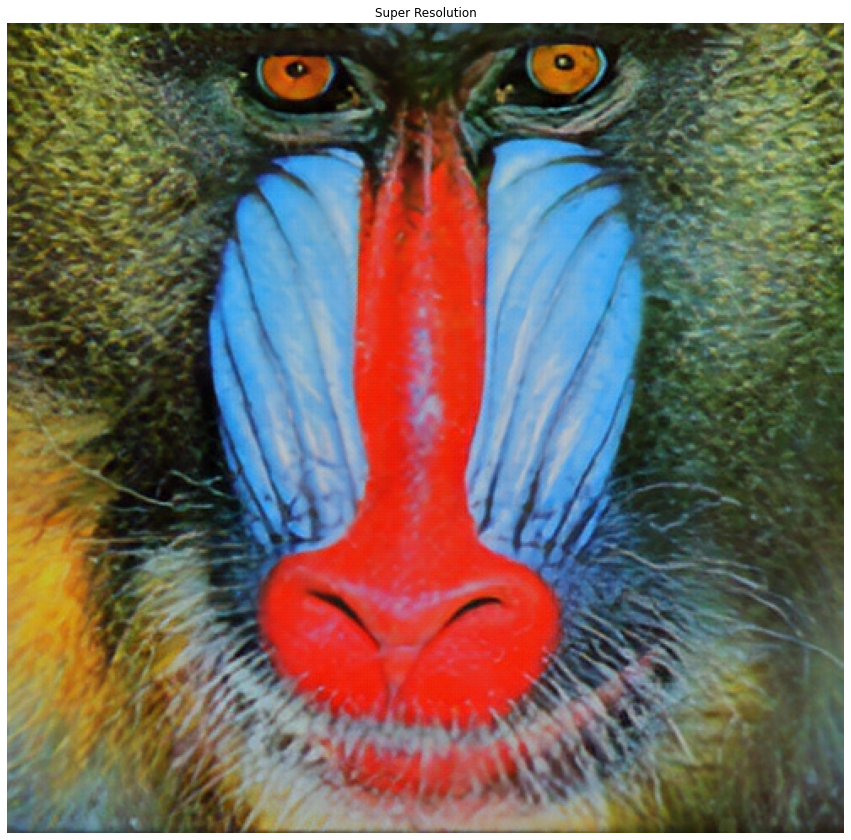

In [ ]:
#Infiriendo
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

plot_image(tf.squeeze(fake_image), title="Super Resolution",  figsize=(15,15))